In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
iris.feature_names[1]

'sepal width (cm)'

In [33]:
df = pd.DataFrame(iris.data)
df = df[[2,3]]

In [34]:
df

,2,3
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [36]:
scaler = MinMaxScaler()
scaler.fit(df[[2]])
df[2] = scaler.transform(df[[2]])

scaler.fit(df[[3]])
df[3] = scaler.transform(df[[3]])

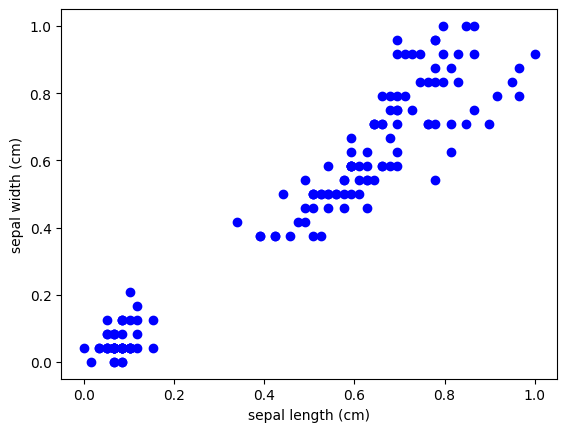

In [37]:
%matplotlib inline
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df[2],df[3], color='blue')

In [54]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[[2,3]])
y_predicted


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [55]:
df['cluster'] = y_predicted

In [56]:
df.cluster.unique()

array([1, 0, 2], dtype=int32)

In [57]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
#df3 = df[df.cluster == 3]
#df4 = df[df.cluster == 4]
#df5 = df[df.cluster == 5]
#df6 = df[df.cluster == 6]
#df7 = df[df.cluster == 7]

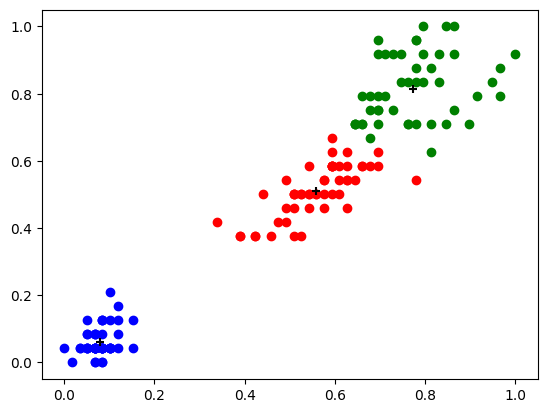

In [58]:
plt.scatter(df0[2],df0[3], color='red')
plt.scatter(df1[2],df1[3], color='blue')
plt.scatter(df2[2],df2[3], color='green')
#plt.scatter(df3[2],df3[3], color='purple')
#plt.scatter(df4[2],df4[3], color='gray')
#plt.scatter(df5[2],df5[3], color='yellow')
#plt.scatter(df6[2],df6[3], color='black')
#plt.scatter(df7[2],df7[3], color='violet')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='+')

In [49]:
km.cluster_centers_

array([[0.44237288, 0.3875    ],
       [0.81779661, 0.703125  ],
       [0.07830508, 0.06083333],
       [0.6256448 , 0.57971014],
       [0.78220339, 0.91041667],
       [0.6779661 , 0.73888889],
       [0.53880464, 0.49122807],
       [0.95932203, 0.84166667]])

In [51]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[[2,3]])
    sse.append(km.inertia_)

In [52]:
sse

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1669312397340443,
 0.8640328909392214,
 0.8013754008534546,
 0.5663174952054538,
 0.5624345702773526,
 0.4781457039711865]

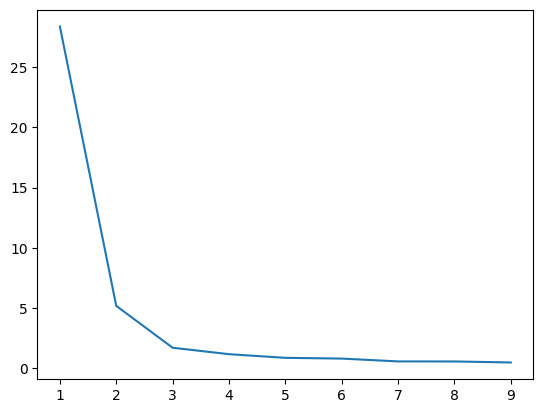

In [53]:
plt.plot(k_rng,sse)